In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
# get current directory

base_dir = 'chest_xray/'

train_dir = base_dir + 'train/'
test_dir = base_dir + 'test/'
val_dir = base_dir + 'val/'

train_neg = train_dir + 'NORMAL'
train_pos = train_dir + 'PNEUMONIA'
test_neg = test_dir + 'NORMAL'
test_pos = test_dir + 'PNEUMONIA'
val_neg = val_dir + 'NORMAL'
val_pos = val_dir + 'PNEUMONIA'

train_pos = [train_pos+'/'+i  for i in os.listdir(train_pos) ]
train_neg = [train_neg + '/' + i for i in os.listdir(train_neg) ]
train_full = train_pos + train_neg
print(len(train_full))

test_pos = [test_pos + '/' + i for i in os.listdir(test_pos) ]
test_neg = [test_neg + '/' + i for i in os.listdir(test_neg)]

val_pos = [val_pos + '/' + i for i in os.listdir(val_pos)]
val_neg = [val_neg + '/' + i for i in os.listdir(val_neg)]

5216


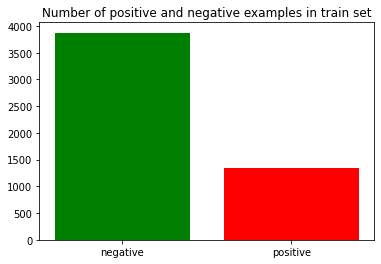

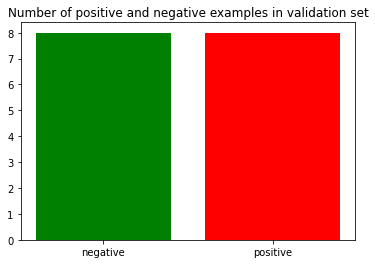

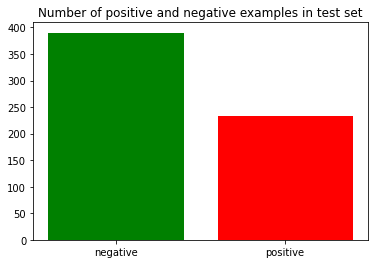

In [11]:
# plot number of positive and negative examples

fig = plt.figure()

plt.bar("negative", len(train_neg),  color = 'g')
plt.bar("positive", len(train_pos), color = "r")
plt.title("Number of positive and negative examples in train set")
plt.show()


fig = plt.figure()

plt.bar("negative", len(val_neg),  color = 'g')
plt.bar("positive", len(val_pos), color = "r")
plt.title("Number of positive and negative examples in validation set")
plt.show()


fig = plt.figure()

plt.bar("negative", len(test_neg),  color = 'g')
plt.bar("positive", len(test_pos), color = "r")
plt.title("Number of positive and negative examples in test set")
plt.show()

In [68]:
import cv2
img_size = 224

def preprocess_image(image_list):
    X = [] #images
    y = [] # labels
    count = 0

    for image in image_list:
        img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_CUBIC)

        # convert to 3d?
        img = np.dstack([img, img, img])

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Normalalize Image
        img = img.astype(np.float32)/255

        count += 1
        if count  % 250 == 0:
            print(f"{count} images processed")

        X.append(img)

        if "NORMAL" in image:
            y.append(0)
        else:
            y.append(1)


    return X, y


In [91]:
# takes ~ 5 min
X, y = preprocess_image(train_full)

250 images processed
500 images processed
750 images processed
1000 images processed
1250 images processed
1500 images processed
1750 images processed
2000 images processed
2250 images processed
2500 images processed
2750 images processed
3000 images processed
3250 images processed
3500 images processed
3750 images processed
4000 images processed
4250 images processed
4500 images processed
4750 images processed
5000 images processed


In [93]:

# reduced via grey scale
X_reduced = []
for image in X:
    X_reduced.append(image[:,:,0])

print(X_reduced[0].shape)
# each image now has 224*224 = 50176 features

(224, 224)
Unique Values :  [0 1]
Occurrence Count :  [1341 3875]


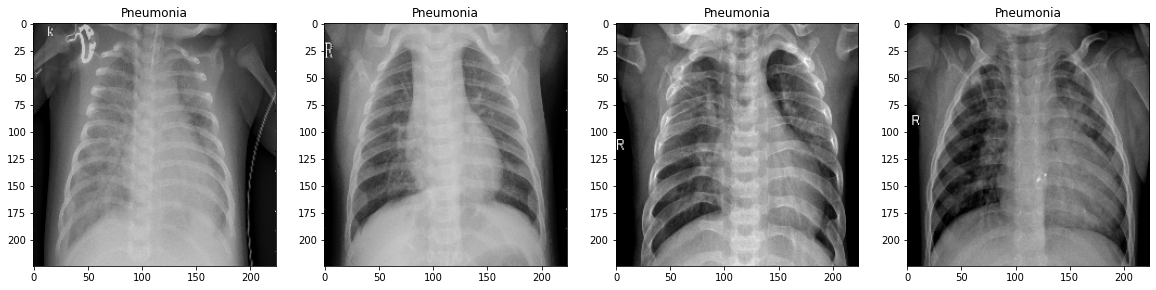

In [66]:

fig = plt.figure(figsize=(20, 5))
k=1
for i in range(4):
    a = fig.add_subplot(1, 4, k)
    if (y[i]==0):
        a.set_title('Normal')
    else:
        a.set_title('Pneumonia')
        
    plt.imshow(X[i])
    k=k+1

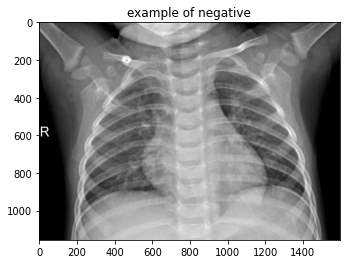

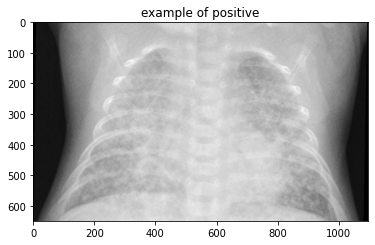

In [84]:
plt.title("example of negative")
img = cv2.imread(train_neg[15])
plt.imshow(img)
plt.show()


plt.title("example of positive")
img = cv2.imread(train_pos[100])
plt.imshow(img)
plt.show()
